In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
data_df=data_df= pd.read_csv("Hr Analytics_320 datapoints.csv")

In [3]:
data_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Candidate Ref,320.0,2.142706e+06,17380.893544,2113130.00,2125857.500,2147299.50,2.157353e+06,2169631.00
Notice period,320.0,3.881250e+01,27.949728,0.00,30.000,30.00,6.000000e+01,120.00
Pecent hike expected in CTC,320.0,4.053691e+01,23.776075,-4.26,25.665,37.50,5.000000e+01,177.78
Percent hike offered in CTC,320.0,3.870449e+01,30.092177,-41.89,22.870,37.25,4.830750e+01,177.78
Rex in Yrs,320.0,4.762500e+00,2.459675,0.00,3.000,4.00,6.000000e+00,13.00
Age,320.0,2.961250e+01,3.846567,23.00,27.000,29.00,3.200000e+01,45.00
Status,320.0,7.437500e-01,0.437245,0.00,0.000,1.00,1.000000e+00,1.00


In [4]:
data_df.shape

(320, 13)

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Candidate Ref                320 non-null    int64  
 1   DOJ Extended                 320 non-null    object 
 2   Notice period                320 non-null    int64  
 3   Pecent hike expected in CTC  320 non-null    float64
 4   Percent hike offered in CTC  320 non-null    float64
 5   Joining Bonus                320 non-null    object 
 6   Gender                       320 non-null    object 
 7   Candidate Source             320 non-null    object 
 8   Rex in Yrs                   320 non-null    int64  
 9   Location                     320 non-null    object 
 10  Candidate relocate actual    320 non-null    object 
 11  Age                          320 non-null    int64  
 12  Status                       320 non-null    int64  
dtypes: float64(2), int64

In [6]:
X_features = list( data_df.columns )
X_features.remove( 'Status' )
X_features

['Candidate Ref',
 'DOJ Extended',
 'Notice period',
 'Pecent hike expected in CTC',
 'Percent hike offered in CTC',
 'Joining Bonus',
 'Gender',
 'Candidate Source',
 'Rex in Yrs',
 'Location',
 'Candidate relocate actual',
 'Age']

In [10]:
encoded_data_df = pd.get_dummies( data_df[X_features], 
                                   drop_first = True )

In [11]:
Y = data_df.Status
X = encoded_data_df

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split( X, Y, 
                                                    test_size = 0.3,
                                                    random_state = 100)

In [12]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'criterion': ['gini','entropy'], 
                     'max_depth': range(2,10)}]


clf_tree = DecisionTreeClassifier()

clf = GridSearchCV(clf_tree,
                 tuned_parameters,
                 cv=10,
                 scoring='roc_auc')

clf.fit(X_train, y_train )

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [13]:
clf.best_score_

0.6970526960784313

In [14]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [15]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion = 'gini', 
                                  max_depth = 3 )

In [16]:
clf_tree.fit( X_train, y_train )

DecisionTreeClassifier(max_depth=3)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn import metrics

In [18]:
def draw_roc( actual, probs ):
    fpr, \
    tpr, \
    thresholds = metrics.roc_curve( actual, 
                                    probs,
                                    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

In [19]:
tree_predict = clf_tree.predict( X_test )
metrics.roc_auc_score( y_test, tree_predict )

0.5529577464788733

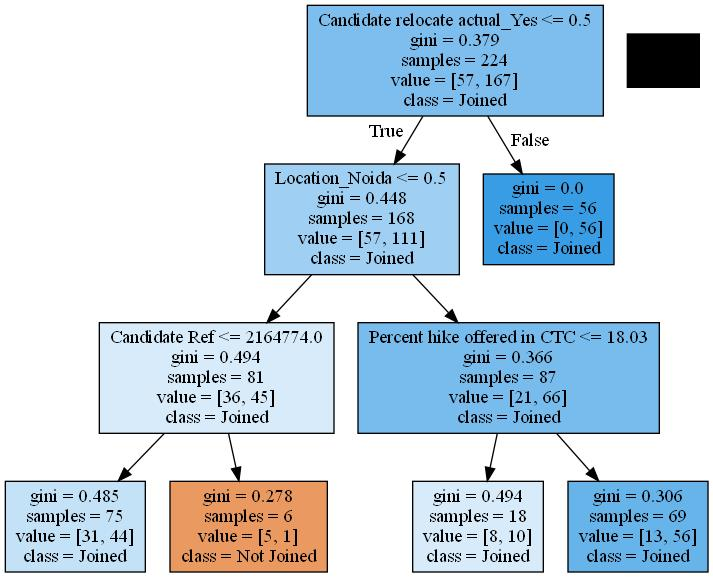

In [21]:
from sklearn.tree  import export_graphviz
import pydotplus as pdot
from IPython.display import Image

# Export the tree into odt file
export_graphviz( clf_tree,
              out_file = "chd_tree.odt",
              feature_names = X_train.columns,
              class_names= ['Not Joined', 'Joined'],  
              filled = True)

# Read the create the image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'chd_tree.odt' )
chd_tree_graph.write_jpg( 'chd_tree.png' )
# Render the png file
Image(filename='chd_tree.png')

In [25]:
cmatrix =metrics.confusion_matrix(y_test,tree_predict, labels=y_test.unique())
pd.DataFrame(cmatrix, index=y_test.unique(), columns=y_test.unique())

,1,0
1,70,1
0,22,3


In [27]:
tree_predict1 = clf_tree.predict( X_train )
metrics.roc_auc_score( y_train, tree_predict1 )

0.5408656371467592

In [28]:
cmatrix =metrics.confusion_matrix(y_train,tree_predict1, labels=y_train.unique())
pd.DataFrame(cmatrix, index=y_train.unique(), columns=y_train.unique())

,1,0
1,166,1
0,52,5


In [22]:
gini_node_1 = 1 - pow(57/224, 2) - pow (167/224, 2)
print( round( gini_node_1, 4) )

0.3794


In [23]:
X_test.shape

(96, 20)

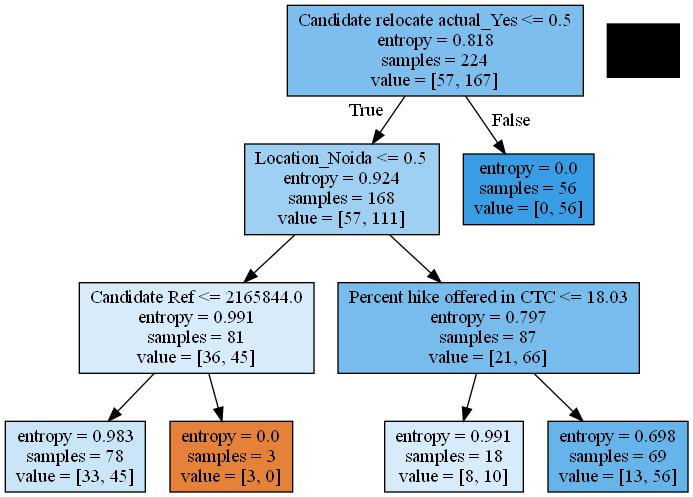

In [24]:
clf_tree_entropy = DecisionTreeClassifier( criterion = 'entropy', 
                                          max_depth = 3 )
clf_tree_entropy.fit( X_train, y_train )

# Export the tree into odt file
export_graphviz( clf_tree_entropy,
              out_file = "chd_tree_entropy.odt",
              feature_names = X_train.columns,
              filled = True )

# Read the create the image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'chd_tree_entropy.odt' )
chd_tree_graph.write_jpg( 'chd_tree_entropy.png' )
# Render the png file
Image(filename='chd_tree_entropy.png')

In [31]:
import math

entropy_node_1 = - (57/224) * math.log2(57/224) - (167/224) * math.log2(167/224)
print( round( entropy_node_1, 3) )

0.818


In [32]:
tree_predict2 = clf_tree_entropy.predict( X_test )
metrics.roc_auc_score( y_test, tree_predict )

0.5529577464788733

In [33]:
cmatrix =metrics.confusion_matrix(y_test,tree_predict2, labels=y_test.unique())
pd.DataFrame(cmatrix, index=y_test.unique(), columns=y_test.unique())

,1,0
1,70,1
0,24,1
